## 1. Import the libraries and prepare the dataset

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, 0].values.reshape(-1, 1)
y = dataset.iloc[:, 1].values.reshape(-1, 1)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Standardize data
pt = PowerTransformer()
x_train = pt.fit_transform(x_train)
x_test = pt.transform(x_test)

## 2. Prepare the models

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

class LinearModel:
    """
    Linear Regression model
    """ 
    def __init__(self):
        self.model = LinearRegression()
        
    def fit(self, x_set, y_set):
        self.model.fit(x_set, y_set)
    
    def predict(self, x_set):
        return self.model.predict(x_set)

class PolyModel:
    """
    Polynomial Regression model
    """
    def __init__(self, degree=4, fit_intercept=False):
        self.features = PolynomialFeatures(degree=degree)
        self.model = LinearRegression(fit_intercept=fit_intercept)
    
    def fit(self, x_set, y_set):
        self.model.fit(self.features.fit_transform(x_set), y_set)
    
    def predict(self, x_set):
        return self.model.predict(self.features.fit_transform(x_set))  

class SVRModel:
    """
    Support Vector Regression model
    """
    def __init__(self, kernel='rbf'):
        self.model = SVR(kernel=kernel)
        
    def fit(self, x_set, y_set):
        self.model.fit(x_set, y_set)
    
    def predict(self, x_set):
        return self.model.predict(x_set)

class DTModel:
    """
    Decision Tree Regression model
    """
    def __init__(self):
        self.model = DecisionTreeRegressor()
    
    def fit(self, x_set, y_set):
        self.model.fit(x_set, y_set)
        
    def predict(self, x_set):
        return self.model.predict(x_set)

models_map = {'linear': LinearModel(), 'decision-tree': DTModel()}
models_map.update({f'polynomial-degree-{degree}': PolyModel(degree=degree) for degree in range(12)})
models_map.update({f'svr-kernel-{kernel}': SVRModel(kernel=kernel) for kernel in {'rbf', 'linear', 'poly', 'sigmoid'}})

for mn in models_map:
    models_map[mn].fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

## 3. Calculate Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

This is the step we find the best parameters for the selected model.

<img src="https://slideplayer.com/slide/10911060/39/images/43/AIC+vs+BIC+AIC+and+BIC+share+the+same+goodness-of-fit+term+but+the+penalty+term+for+the+BIC+is+potentially+much+more+stringent+than+for+the+AIC..jpg" width="450" height="auto" />

(Source: [Darcy Griffin, 2016](https://slideplayer.com/slide/10911060/))

For AIC, from [Wikipedia](https://en.wikipedia.org/wiki/Akaike_information_criterion),

> AIC is founded on information theory. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

For BIC, from [Wikipedia](https://en.wikipedia.org/wiki/Bayesian_information_criterion),

> In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred.

Credits: [Jason Brownlee, 2019](https://machinelearningmastery.com/probabilistic-model-selection-measures/)

In [3]:
from sklearn.metrics import mean_squared_error

scores = []
no_of_params = x_test.shape[1] + 1

for model_name, model in models_map.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    aic = x_test.shape[0] * np.log(mse) + 2 * no_of_params
    bic = x_test.shape[0] * np.log(mse) + no_of_params * np.log(x_test.shape[0])
    scores.append((model_name, mse, aic, bic))

In [4]:
from IPython.display import display, HTML

df_results = pd.DataFrame(scores, columns=['Rank', 'MSE', 'AIC', 'BIC'])
df_results = df_results.sort_values(by=['MSE', 'AIC', 'BIC'], ascending=True)

best_mn = df_results.values[0][0]

display(HTML(df_results.to_html()))

,Rank,MSE,AIC,BIC
0,linear,1.032530e+09,2079.527776,2084.738116
3,polynomial-degree-1,1.032530e+09,2079.527776,2084.738116
17,svr-kernel-poly,1.068062e+09,2082.911122,2088.121462
14,svr-kernel-linear,1.069819e+09,2083.075577,2088.285918
16,svr-kernel-sigmoid,1.069992e+09,2083.091709,2088.302049
2,polynomial-degree-0,1.070017e+09,2083.094032,2088.304372
9,polynomial-degree-7,1.070021e+09,2083.094400,2088.304741
15,svr-kernel-rbf,1.070082e+09,2083.100106,2088.310446
8,polynomial-degree-6,1.073694e+09,2083.437105,2088.647445
7,polynomial-degree-5,1.076656e+09,2083.712597,2088.922937


## 4. Display results

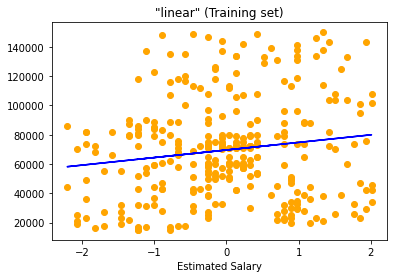

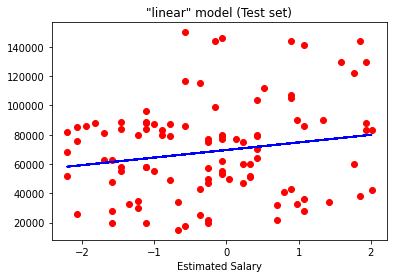

,x-value,y-value,y-predict-value,epsilon
0,[19],[19000],[167969.83493604622],[148969.83493604622]
1,[35],[20000],[250821.62575938337],[230821.62575938337]
2,[26],[43000],[204217.4934212562],[161217.4934212562]
3,[27],[57000],[209395.7303477148],[152395.7303477148]
4,[19],[76000],[167969.83493604622],[91969.83493604622]
...,...,...,...,...
395,[46],[41000],[307782.23195042764],[266782.23195042764]
396,[51],[23000],[333673.4165827205],[310673.4165827205]
397,[50],[20000],[328495.1796562619],[308495.1796562619]
398,[36],[33000],[255999.86268584192],[222999.86268584192]


In [5]:
from matplotlib.colors import ListedColormap

model = models_map[best_mn]

plt.scatter(x_train, y_train, color='orange')
plt.plot(x_train, model.predict(x_train), color='blue')
plt.title(f'"{best_mn}" (Training set)')
plt.xlabel('Age')
plt.xlabel('Estimated Salary')
plt.show()

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, model.predict(x_test), color='blue')
plt.title(f'"{best_mn}" model (Test set)')
plt.xlabel('Age')
plt.xlabel('Estimated Salary')
plt.show()

df = pd.DataFrame(list(zip(x, y, model.predict(x))), columns=['x-value', 'y-value', 'y-predict-value'])
df['epsilon'] = np.abs(df['y-value'] - df['y-predict-value'])
df.head(x.shape[0])